In [17]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.ensemble import RandomForestRegressor


# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Remove row number, ID, and gender columns
nhanes = pd.read_csv('nhanes_data.csv')
nhanes = nhanes.drop(nhanes.columns[0], axis=1)
nhanes = nhanes.drop('ID', axis=1)
nhanes = nhanes.drop('Gender', axis=1)
nhanes.head()    

,Albumin,Blood_Urea_Nitrogen,Creatinine,C_Reactive_Protein,Glucose,Glycohemoglobin,Total_Cholesterol,Uric_Acid,White_Blood_Cell_Count,Lymphocyte_Percent,Mean_Cell_Volume,Red_Cell_Distribution_Width,Systolic_Blood_Pressure,Age
0,4.4,11,0.92,2.72,85,6.2,157,5.8,8.6,40.0,67.0,15.6,200.000000,66
1,4.4,12,0.81,0.74,94,5.2,149,8.0,6.1,24.6,89.7,12.2,111.333333,18
2,5.2,17,0.64,0.32,115,5.6,199,5.5,11.2,37.1,83.9,13.6,128.000000,13
3,3.9,16,0.58,1.83,116,6.2,210,4.5,6.0,31.3,86.8,13.4,142.000000,66
4,3.7,20,1.32,6.94,96,6.3,180,6.2,7.2,25.8,88.8,15.7,118.666667,75


In [32]:
# Labels are the values we want to predict
labels = np.array(nhanes['Age'])

# Features are the input values: excluding Age
features = np.array(nhanes.drop('Age', axis = 1))

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (3938, 13)
Training Labels Shape: (3938,)
Testing Features Shape: (1313, 13)
Testing Labels Shape: (1313,)


In [33]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [34]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'years.')

Mean Absolute Error: 9.15 years.


In [35]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 73.01 %.


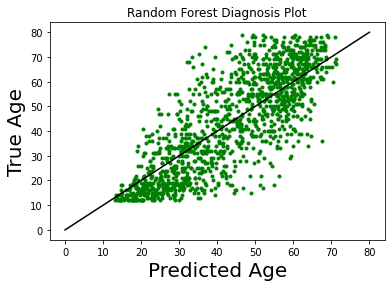

Random Forest MSE:
135.88609759025132


In [38]:
# Diagnosis plot
plt.plot(predictions, test_labels, '.g')
plt.plot([0, 80], [0, 80], 'k')
plt.xlabel('Predicted Age', size = 20)
plt.ylabel('True Age', size = 20)
plt.title('Random Forest Diagnosis Plot')
plt.show()

# Calculate mean squared error, purely for comparison to linear regression
mse = np.mean((test_labels - predictions)**2)
print('Random Forest MSE:')
print(mse)